# Excercise-1:

Use the Europe_Covid.txt file from the DATA 690 Data Files


Exercise 1. Compute the Jaccard similarity index


• Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among other libraries


• Use these pairs for comparison:

o pair1 = ["What you do defines you","Your deeds define you"]\
o pair2 = ["Once upon a time there lived a king.", "Who is your
queen?"]\
o pair3 = ["He is desperate", "Is he not desperate?"]\
• What is the Jaccard similarity index between pair1[0] and pair1[1]?

# Solution:


**Importing The necessary libraries**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

                                                                                # Download necessary nltk resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Extracting the data from the File Europe_Covid.txt**

In [ ]:
file_path="/content/drive/MyDrive/NLP/Week9/Europe_Covid.txt"
with open(file_path, 'r') as file:
    data = file.read()

**Checking the Data is retrieved or not**

In [ ]:
data

'European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe\'s political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda\'s dia

**Initialize Lemmatizer and Define Stopwords**

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


**Define the Jaccard Similarity Function**

In [ ]:
def jaccard_similarity(s1, s2):
                                                                                # Tokenize, lemmatize, and remove stopwords
    words1 = set([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(s1) if word.isalnum() and word.lower() not in stop_words])
    words2 = set([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(s2) if word.isalnum() and word.lower() not in stop_words])

                                                                                # Compute Jaccard Similarity
    intersection = words1.intersection(words2)
    union = words1.union(words2)
    return len(intersection) / len(union) if union else 0


**Define Sentence Pairs**

In [ ]:
                                                                                # Pairs for comparison
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]


**Calculate Jaccard Similarity for pair1**

In [ ]:
                                                                                # Calculate Jaccard similarity for pair1
jaccard_index_pair1 = jaccard_similarity(pair1[0], pair1[1])

print("Jaccard Similarity Index between pair1[0] and pair1[1]:", jaccard_index_pair1)


Jaccard Similarity Index between pair1[0] and pair1[1]: 0.0


# Exercise:2

Compute the Levenshtein distance between "I cannot believe
what he said" and "I believe it is not what he said". \

What does the result mean?

# Solution:



**Install the required libraries**

In [ ]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.3 MB/s eta 0:00:00


**Compute the Distance:**

In [9]:
import Levenshtein

                                                                                # Define the sentences
sentence1 = "I cannot believe what he said"
sentence2 = "I believe it is not what he said"

                                                                                # Calculate Levenshtein distance
lev_distance = Levenshtein.distance(sentence1, sentence2)

print("Levenshtein Distance:", lev_distance)


Levenshtein Distance: 15


Explanation of the Result:

The Levenshtein distance result shows the number of character changes needed to transform one sentence into the other. A higher distance means the sentences are more different, while a lower distance means they are more similar.

For these sentences, A Levenshtein distance of 15 between the sentences "I cannot believe what he said" and "I believe it is not what he said" means that 15 single-character edits (insertions, deletions, or substitutions) are needed to change one sentence into the other.

# Exercise-3:

Compute the most similar words to 'government' and 'curfew'
based on the text.

# Solution:

**Importing Required Libraries**

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

                                                                                # Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Preprocessing the Data:**

In [11]:
                                                                                # Preprocess the text
stop_words = set(stopwords.words('english'))
sentences = sent_tokenize(data)                                                 # Tokenize data into sentences
tokenized_sentences = [
    [word.lower() for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
    for sentence in sentences
]

**Training Model on tokenized sentences**

In [12]:

                                                                                # Train Word2Vec model on tokenized sentences
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
                                                                                # Find most similar words to 'government' and 'curfew'
try:
    similar_to_government = model.wv.most_similar('government', topn=5)
    similar_to_curfew = model.wv.most_similar('curfew', topn=5)

    print("Most similar words to 'government':", similar_to_government)
    print("Most similar words to 'curfew':", similar_to_curfew)
except KeyError as e:
    print(f"Word not found in vocabulary: {e}")


Most similar words to 'government': [('requested', 0.2766548693180084), ('include', 0.2511236071586609), ('officially', 0.24679426848888397), ('tough', 0.2459130883216858), ('feeling', 0.24463438987731934)]
Most similar words to 'curfew': [('would', 0.3191409111022949), ('granada', 0.23869231343269348), ('longterm', 0.21606673300266266), ('numbers', 0.21404778957366943), ('since', 0.20411823689937592)]


# Exercise-4 :

**What is the sentiment and subjectivity of the Europe_Covid text?**

# Solution:

In [14]:
from textblob import TextBlob

europe_covid_text = TextBlob(data)

                                                                                # Get sentiment (polarity and subjectivity)
polarity = europe_covid_text.sentiment.polarity
subjectivity = europe_covid_text.sentiment.subjectivity

print("Sentiment Polarity:", polarity)
print("Subjectivity:", subjectivity)


Sentiment Polarity: 0.04992382294707877
Subjectivity: 0.3476432095036746


Sentiment Polarity (0.05): With a polarity score close to zero, the sentiment is generally neutral with a very slight lean towards positivity. This suggests that the text may contain balanced information, without strong positive or negative language.

Subjectivity (0.35): A subjectivity score of 0.35 indicates that the text is relatively objective, likely containing more factual information rather than opinions. However, there's a small degree of subjectivity, which may reflect some interpretative or opinion-based elements in the content.

# Exercise 5.

 WordCloud\
• What are the most frequently used words in the Europe_Covid text?

# Solution:

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

                                                                                # Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:

                                                                                # Preprocess the text by removing stopwords and non-alphabetic characters
stop_words = set(stopwords.words('english'))
processed_text = ' '.join([word.lower() for word in data.split() if word.isalpha() and word.lower() not in stop_words])


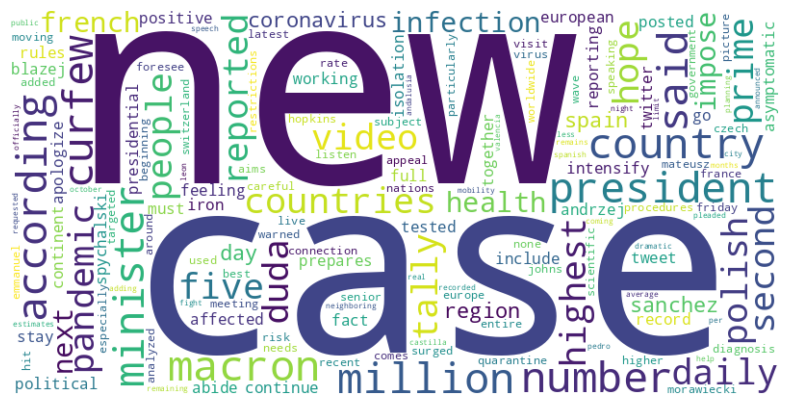

In [19]:

                                                                                # Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

                                                                                # Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Exercise 6.


 Summarize the text in 5 sentences using extractive
summarization.

# Solution:

In [24]:
!pip install transformers



In [28]:
from transformers import pipeline


In [29]:

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")



config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [33]:

                                                                                # Perform summarization with a target of approximately 5 sentences
summary = summarizer(data, max_length=200, min_length=100, do_sample=False)[0]['summary_text']



In [34]:
                                                                                # Split the summary into sentences and print each one
for sentence in summary.split('.'):
                                                                                # Strip any extra whitespace and print only non-empty sentences
    sentence = sentence.strip()
    if sentence:
        print(sentence + ".")

Polish President Andrzej Duda tested positive for Covid-19 on Friday.
France reported 42,032 new cases in 24 hours, a new record.
Spain reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages.
The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.


# Exercise 7.

 Use a zero-shot transformer to determine the following
categories: informational, query, advocacy, not informational.

# Solution:

**Loading the Zero-shot Classification pipe line with a Pre-trained model.**

In [35]:
                                                                                # Load the zero-shot classification pipeline with a pre-trained model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**Defining the category**

In [37]:
                                                                                # Define the categories
labels = ["informational", "query", "advocacy", "not informational"]

**Performing Zero-shot Classification**

In [38]:
                                                                                # Perform zero-shot classification
result = classifier(data, candidate_labels=labels)

**Printing the Results:**

In [39]:
                                                                                # Print the classification results
for label, score in zip(result['labels'], result['scores']):
    print(f"{label}: {score:.4f}")

advocacy: 0.3609
query: 0.3519
informational: 0.2507
not informational: 0.0365
